In [1]:
import sys
sys.path.append('/home/mod/Workspace/shopee-product-2020/')

In [2]:
import pandas as pd
from shopee.dataset import ShopeeDataset, get_transform
from shopee.utils import load_train_valid_df
from torch.utils.data import DataLoader

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [46]:
data_path = '/home/mod/Workspace/shopee-data/'
image_train_dir = '/home/mod/Workspace/shopee-data/train'
image_size = 256
batch_size=4

In [47]:
train_df, valid_df, n_classes = load_train_valid_df(data_dir=data_path, fold=0, train=True)
train_dataset = ShopeeDataset(
        train_df, image_dir=image_train_dir,
        transform=get_transform(image_size=image_size, train=True, normalize=False),
)
valid_dataset = ShopeeDataset(
        valid_df, image_dir=image_train_dir,
        transform=get_transform(image_size=image_size, train=False),
)

data_train_loader = DataLoader(
    train_dataset, batch_size=batch_size,
)
data_valid_loader = DataLoader(
    valid_dataset, batch_size=batch_size,
)

In [48]:
img = data_train_loader.dataset[666][0].permute(1,2,0).cpu().numpy()

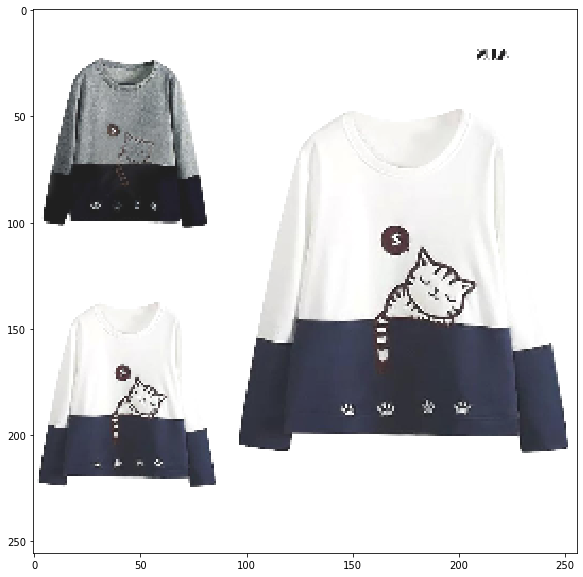

In [49]:
plt.figure(figsize=(10, 10))
plt.imshow(img)